In [331]:
!python -V

Python 3.9.6


In [332]:
!pip install pandas==1.2.5 pandas_datareader yfinance ipywidgets pandas_market_calendars matplotlib numpy pycorrelate


In [333]:
import os
from datetime import datetime
import concurrent
import pandas_datareader.data as web
import pandas as pd
import datetime
import concurrent.futures
from concurrent.futures import wait, ALL_COMPLETED
import yfinance as yf
import urllib
import urllib.request
import time
from datetime import timedelta

from ipywidgets import interactive
import numpy as np

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import numpy as np
import pycorrelate as pyc

In [334]:


#frequency = output_variable.value
frequency = "D"

w=117*8
#start = datetime.datetime(2010, 1, 1)

#end = datetime.datetime(2013, 1, 27)
end_date = datetime.date.today()

start_date = end_date - timedelta(weeks=w)

pd.set_option('display.max_columns', None) #replace n with the number of columns you want to see completely
pd.set_option('display.max_rows', None) #replace n with the number of rows you want to see completely

#cores = int(len(os.sched_getaffinity(0)))

print(end_date)
print(start_date)



etf_commodities = ['DBO','CORN', 'WEAT', 'SOYB', 'JO', 'SGG', 'BAL', 'COW', 'MOO', 'TAGS', 'KOL' ]
#Gold, Silver, Platinum, Copper, Paladium, Aluminum, Iron, Steel
etf_metals = ['IAU', 'SLV', 'PGM', 'JJC', 'PALL', 'JJU', 'IFUNX', 'SLX']
#US dollar, European Euro, Japanese yen, Pound sterling, Australian dollar, Canadian dollar, Swiss franc, Chinese Yuan Renminbi, Swedish Krona, Peso, India
#defunct: Russia: XRU, Mexico: FXM
etf_foreign_exchanges = ['UUP','FXE','FXY','FXB','FXA','FXC','FXF','CYB', 'FXS', 'INR']
#residential, Ishares all NAmerica
etf_real_estate = ['REZ', 'IYR']
#Russia, Germany, UK, Japan, China, Euro, Euro, Brazil, Latin America, Mexico, India
etf_economies = ['ERUS','EWG','EWU','EWJ','MCHI','EZU','IEUR','EWZ','ILF','EWW','INDA']
#Ishares Investment Grade, IShares core aggregate Investment grade, Short, Total, 1-5 Years, 5-10 Years, 10 Years, Gov/Credit
#defunct:

etf_spdr_indexes = ['XLC','XLY','XLP','XLE','XLF','XLV','XLI','XLB','XLRE','XLK','XLU']
etf_dow_components = ['MMM','AXP','AMGN','AAPL','BA','CAT','CVX','CSCO','KO','DOW','GS','HD','HON','IBM','INTC','JNJ','JPM','MCD','MRK','MSFT','NKE','PG','CRM','TRV','UNH','VZ','V','WMT','WBA','DIS']

etf_bonds = ['LQD', 'AGG', 'NEAR', 'IUSB', 'ISTB', 'IMTB', 'ILTB', 'GBF']
etf_muni_bonds = ['MUB', 'SUB', 'MEAR']

etf_treasuries = ['AGZ', 'GOVT', 'BIL', 'SHV', 'SHY', 'IEI', 'IEF', 'TLT']

crypto = ['BTC-USD','ETH','RPL','BCH','EOS','LTC']

#,'GOLDAMGBD228NLBM',
FRED_Indicators = ['DGS2','CPALTT01USQ657N','PAYEMS','IRLTLT01USM156N','MABMM301USM189S','LFWA64TTUSM647S','MANMM101USA189S','MICH','UMCSENT','CSCICP03USM665S','DGS10','DTB3','DGS3MO','CASTHPI','GDPC1','CIVPART','POPTOTUSA647NWDB','MEHOINUSA672N','HOSMEDUSM052N','MORTGAGE30US','TTLHH','CSUSHPINSA','EMRATIO','CPIAUCSL','PSAVERT','LRUN64TTUSQ156S','USSTHPI','NYSTHPI','M2V','GFDEBTN','DFII10','GFDEGDQ188S','CUSR0000SEHA','ETOTALUSQ176N','ERENTUSQ176N','RECPROUSM156N','T5YIFR','BAMLHYH0A0HYM2TRIV','BAMLCC0A1AAATRIV','GVZCLS','DGS1','BAMLCC0A4BBBTRIV','VXVCLS','IC4WSA','WILLMICROCAPPR','WILLLRGCAPVAL','CFNAIDIFF','MZMSL','KCFSI','T5YIE','TOTALSA','USSLIND','AWHAETP','CES0500000003','TCU','WTB3MS','WGS3MO','TWEXB','DEXCHUS','DEXUSUK','CILACBQ158SBOG','CES4348400001','FEDFUNDS','TDSP','PERMIT','GFDEGDQ188S','CP','PRFI','DRSFRMACBS','DRCCLACBS','DRBLACBS','DALLCIACBEP','USROA','USROE','RSAHORUSQ156S','MEFAINUSA672N','COMREPUSQ159N','HDTGPDUSQ163N','POP','NROU','FGCCSAQ027S','TEDRATE', 'VIXCLS', 'NFCI','INDPRO','LES1252881600Q','CUUR0000SEHA','LEU0252918500Q','BAA10Y','BAMLC0A0CM','BAMLH0A3HYC','BOGMBASE','DCOILBRENTEU','DCOILWTICO','DFF','DGS1MO','DGS30','DGS5','FPCPITOTLZGUSA','ICSA','INTDSRUSM193N','M1','M1V','MPRIME','PPIACO','SPCS20RSA','STLFSI2','T10Y2Y','T10Y3M','TB3MS','TREAST','UNRATE','WPU0911']
#FRED_Indicators = ["CPALTT01USQ657N","PAYEMS","IRLTLT01USM156N","MABMM301USM189S","LFWA64TTUSM647S","MANMM101USA189S","MICH","UMCSENT","CSCICP03USM665S","DGS10","DTB3","DGS3MO","CASTHPI","GDPC1","CIVPART","POPTOTUSA647NWDB","MEHOINUSA672N","HOSMEDUSM052N","MORTGAGE30US","TTLHH","CSUSHPINSA","EMRATIO","CPIAUCSL","PSAVERT","LRUN64TTUSQ156S","USSTHPI","NYSTHPI","M2V","GFDEBTN","DFII10","GFDEGDQ188S","CUSR0000SEHA","ETOTALUSQ176N","ERENTUSQ176N","RECPROUSM156N","T5YIFR","BAMLHYH0A0HYM2TRIV","BAMLCC0A1AAATRIV","GVZCLS","DGS1","BAMLCC0A4BBBTRIV","VXVCLS","IC4WSA","WILLMICROCAPPR","WILLLRGCAPVAL","CFNAIDIFF","MZMSL","KCFSI","T5YIE","TOTALSA","USSLIND","AWHAETP","CES0500000003","TCU","WTB3MS","WGS3MO","TWEXB","DEXCHUS","DEXUSUK","CILACBQ158SBOG","CES4348400001","FEDFUNDS","TDSP","PERMIT","GFDEGDQ188S","CP","PRFI","DRSFRMACBS","DRCCLACBS","DRBLACBS","DALLCIACBEP","USROA","USROE","RSAHORUSQ156S","MEFAINUSA672N","COMREPUSQ159N","HDTGPDUSQ163N","POP","NROU","FGCCSAQ027S","TEDRATE", "VIXCLS", "NFCI","INDPRO","LES1252881600Q","CUUR0000SEHA","LEU0252918500Q","BAA10Y","BAMLC0A0CM","BAMLH0A3HYC","BOGMBASE","DCOILBRENTEU","DCOILWTICO","DFF","DGS1MO","DGS30","DGS5","FPCPITOTLZGUSA","GOLDAMGBD228NLBM","ICSA","INTDSRUSM193N","M1","M1V","MPRIME","PPIACO","SPCS20RSA","STLFSI2","T10Y2Y","T10Y3M","TB3MS","TREAST","UNRATE","WPU0911"]

Indexes = ['^SP500TR', '^GSPC', 'QQQ', 'DIA', 'VTWO']

ManualStocks = ['VOO','SPY']

etf_indexes_and_Crypto_list = [Indexes, ManualStocks, etf_commodities, etf_metals, etf_foreign_exchanges, etf_real_estate, etf_economies, etf_bonds, etf_muni_bonds, etf_treasuries, crypto, etf_spdr_indexes, etf_dow_components]

commodities = []
for sublist in etf_indexes_and_Crypto_list:
    for val in sublist:
        commodities.append(val)

#pool2 = concurrent.futures.ProcessPoolExecutor(cores)

completed = []
def dl(name):
    subset = yf.download(name, start=start_date, end=end_date, auto_adjust=True).iloc[:, :6].dropna(axis=0, how='any')
    subset = subset[start_date.strftime('%Y-%m-%d'):end_date.strftime('%Y-%m-%d')]
    #sleep(4)
    if len(subset) != 0:
        completed.append(name)
        return (subset)

#futures2 = [pool2.submit(dl, args) for args in commodities]
#wait(futures2, timeout=4, return_when=ALL_COMPLETED)

futures2 = []
#pd.DataFrame()
for i in commodities:
    futures2.append(dl(i))

#print(futures2.describe())


2021-07-05
2003-07-28
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[***********

In [335]:
import pandas_market_calendars as mcal

# Create a calendar
nyse = mcal.get_calendar('NYSE')

# Show available calendars
print(mcal.get_calendar_names())
early = nyse.schedule(start_date, end_date)


['ASX', 'BMF', 'CFE', 'NYSE', 'stock', 'NASDAQ', 'BATS', 'CME_Equity', 'CBOT_Equity', 'CME_Agriculture', 'CBOT_Agriculture', 'COMEX_Agriculture', 'NYMEX_Agriculture', 'CME_Rate', 'CBOT_Rate', 'CME_InterestRate', 'CBOT_InterestRate', 'CME_Bond', 'CBOT_Bond', 'EUREX', 'HKEX', 'ICE', 'ICEUS', 'NYFE', 'JPX', 'LSE', 'OSE', 'SIX', 'SSE', 'TSX', 'TSXV', 'BSE', 'TASE', 'ASEX', 'BVMF', 'CMES', 'IEPA', 'XAMS', 'XASX', 'XBKK', 'XBOG', 'XBOM', 'XBRU', 'XBUD', 'XBUE', 'XCBF', 'XCSE', 'XDUB', 'XFRA', 'XETR', 'XHEL', 'XHKG', 'XICE', 'XIDX', 'XIST', 'XJSE', 'XKAR', 'XKLS', 'XKRX', 'XLIM', 'XLIS', 'XLON', 'XMAD', 'XMEX', 'XMIL', 'XMOS', 'XNYS', 'XNZE', 'XOSL', 'XPAR', 'XPHS', 'XPRA', 'XSES', 'XSGO', 'XSHG', 'XSTO', 'XSWX', 'XTAE', 'XTAI', 'XTKS', 'XTSE', 'XWAR', 'XWBO', 'us_futures', '24/7', '24/5']


In [336]:

commodities_ = pd.DataFrame()

for x in range(0,len(completed)):
    values = futures2[x]
    values.index = pd.to_datetime(values.index)
    values = values.resample(frequency).mean().dropna()
    values['Symbol'] = x
    values = values.loc[~values.index.duplicated(keep='last')]
    values = values.reset_index()

    commodities_ = pd.concat([commodities_,values], axis=0)



In [337]:
import re

commodities_pvt = pd.pivot_table(commodities_, values='Close', index=['Date'],columns=['Symbol'])
commodities_pvt.columns = completed
wd = os.getcwd()

commodities_pvt.to_csv(re.sub('code', 'data', wd)+"\commodities.csv")


In [338]:
#commodities_pvt.describe()

In [339]:
def Fred_Data(name):
    temp = web.DataReader(str(name), 'fred', start_date, end_date)
    temp.index = pd.to_datetime(temp.index)
    temp = temp.resample(frequency).mean().dropna()
    return(temp)

#pool1 = concurrent.futures.ProcessPoolExecutor(cores)

#futures1 = [pool1.submit(Fred_Data, args) for args in FRED_Indicators]
#wait(futures1, timeout=None, return_when=ALL_COMPLETED)

FRED_set = []
FRED_completed = []
for i in FRED_Indicators:
    FRED_completed.append(i)
    FRED_set.append(Fred_Data(i))



In [340]:

FRED_pvt = pd.DataFrame()

for x in range(0,len(FRED_completed)):
    values = FRED_set[x]
    #values.index = pd.to_datetime(FRED_set["DATE"])
    values = values.resample(frequency).mean().dropna()
    #values['Symbol'] = x
    values = values.loc[~values.index.duplicated(keep='last')]
    #values = values.reset_index()

    FRED_pvt = pd.concat([FRED_pvt,values], axis=1)

#FRED_ = pd.pivot_table(commodities_, values='Close', index=['Date'],columns=['Symbol'])
#FRED_.to_csv("/mnt/distvol/FRED_set.csv")



In [341]:

#FRED_pvt = pd.pivot_table(FRED_, index=['DATE'])
FRED_pvt.to_csv(re.sub('code', 'data', wd)+"\FRED_pvt.csv")

#print(len(FRED_.columns))
#print(len(FRED_))
#FRED_pvt.columns = FRED_completed
#FRED_pvt.describe()

In [342]:
#FRED_pvt.set_index(FRED_pvt.index)

In [343]:
combined_set = pd.concat([FRED_pvt.set_index(FRED_pvt.index),commodities_pvt],axis=1)

In [344]:
if True:
    combined_set = combined_set.interpolate(method='linear', limit_direction='forward', axis=0)

In [345]:
combined_set.describe().loc['count'].index[combined_set.describe().loc['count']<(len(combined_set)-1)]

Index(['CPALTT01USQ657N', 'PAYEMS', 'IRLTLT01USM156N', 'MABMM301USM189S',
       'LFWA64TTUSM647S', 'MANMM101USA189S', 'MICH', 'UMCSENT',
       'CSCICP03USM665S', 'CASTHPI',
       ...
       'SHV', 'IEI', 'BTC-USD', 'RPL', 'EOS', 'XLC', 'XLRE', 'DOW', 'CRM',
       'V'],
      dtype='object', length=143)

In [346]:
combined_set['^SP500TR'].describe()

count    6552.000000
mean     3308.619198
std      1778.665601
min      1095.040039
25%      1919.950012
50%      2421.441610
75%      4338.049927
max      9058.660156
Name: ^SP500TR, dtype: float64

In [347]:
len(drops)

143

In [348]:

drops = combined_set.describe().loc['count'].index[combined_set.describe().loc['count']<(len(combined_set)-1)]
print(drops)
filtered = combined_set.columns.tolist()

for d in drops:
    #print(d)
    filtered.remove(d)
#filtered.remove(drops.tolist())
#combined_set[filtered].to_csv("/mnt/distvol/combined_set.csv")

#drop first/last row
all_data = combined_set[filtered]
all_data = all_data.iloc[:-1,:]
all_data = all_data.iloc[1:,:]

all_data.loc[:, (all_data != all_data.iloc[0]).any()] 

all_data.to_csv(re.sub('code', 'data', wd)+"\combined_set.csv")
#filtered
all_data.describe()

Index(['CPALTT01USQ657N', 'PAYEMS', 'IRLTLT01USM156N', 'MABMM301USM189S',
       'LFWA64TTUSM647S', 'MANMM101USA189S', 'MICH', 'UMCSENT',
       'CSCICP03USM665S', 'CASTHPI',
       ...
       'SHV', 'IEI', 'BTC-USD', 'RPL', 'EOS', 'XLC', 'XLRE', 'DOW', 'CRM',
       'V'],
      dtype='object', length=143)


,DGS2,DGS10,DTB3,DGS3MO,DFII10,T5YIFR,BAMLHYH0A0HYM2TRIV,BAMLCC0A1AAATRIV,DGS1,BAMLCC0A4BBBTRIV,WILLMICROCAPPR,WILLLRGCAPVAL,T5YIE,DEXCHUS,DEXUSUK,TEDRATE,VIXCLS,BAA10Y,BAMLC0A0CM,BAMLH0A3HYC,DCOILBRENTEU,DCOILWTICO,DFF,DGS1MO,DGS30,DGS5,M1,T10Y2Y,T10Y3M,^SP500TR,^GSPC,QQQ,DIA,SPY,IYR,EWG,EWU,EWJ,EZU,EWZ,ILF,EWW,LQD,SHY,IEF,TLT,ETH,BCH,LTC,XLY,XLP,XLE,XLF,XLV,XLI,XLB,XLK,XLU,MMM,AXP,AMGN,AAPL,BA,CAT,CVX,CSCO,KO,GS,HD,HON,IBM,INTC,JNJ,JPM,MCD,MRK,MSFT,NKE,PG,TRV,UNH,VZ,WMT,WBA,DIS
count,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000
mean,1.630568,2.923569,1.203250,1.229305,0.876415,2.253311,893.823436,522.798760,1.431538,620.794066,9221.183622,51354.206638,1.841256,6.947469,1.580565,0.419257,18.888354,2.560479,1.610555,10.235898,70.902885,67.242467,1.316218,1.167810,3.599760,2.255151,3334.355878,1.292992,1.694252,3308.026220,1818.373943,91.833400,138.225176,159.364062,51.198564,20.829690,24.817324,42.290932,30.239261,34.513172,26.601639,40.742599,85.021855,75.139622,83.336981,90.359601,18.671931,15.628489,22.664838,58.183021,32.433001,46.466431,17.533696,48.503802,41.378008,36.135095,38.235199,31.699478,100.397629,60.913010,99.082317,24.181967,118.330655,74.136251,67.251057,23.186619,28.269168,151.460041,83.889022,72.893404,103.102878,25.457169,74.025377,52.043954,83.709038,37.834353,53.162013,37.809947,61.828046,68.645983,102.165908,30.438900,60.768264,42.056680,63.415329
std,1.451924,1.140617,1.507045,1.545655,0.972150,0.366196,327.387196,120.166192,1.544471,192.024736,3472.190325,23614.556545,0.558163,0.690267,0.227240,0.418211,8.994590,0.778324,0.961961,4.828283,26.667754,23.362388,1.617594,1.516827,1.049824,1.262815,3859.511081,0.872636,1.117292,1777.367959,778.621232,73.755834,72.264291,84.835980,19.852833,6.081154,4.952121,9.813774,7.264349,12.984816,8.714843,12.597482,23.711654,7.390811,20.073372,30.996175,4.855486,7.793629,12.311336,39.146767,16.170075,13.492542,6.373011,28.390589,21.436065,15.054554,29.708576,14.719157,53.001108,30.351766,62.762737,29.894867,99.553792,43.024754,26.476073,11.311834,12.291979,56.206451,77.690902,52.762098,32.741837,14.181354,38.494891,33.280627,60.054623,18.996411,56.555944,33.555778,27.847839,39.316261,96.317287,14.296722,29.333397,17.671583,44.267621
min,0.090000,0.520000,-0.050000,0.000000,-1.080000,0.430000,393.960000,340.080000,0.040000,344.640000,2823.500000,17870.590000,-2.240000,6.040200,1.149200,0.080000,9.140000,1.480000,0.790000,4.140000,9.120000,-36.980000,0.040000,0.000000,0.990000,0.190000,1285.800000,-0.190000,-0.640000,1095.040039,676.530029,22.676090,49.059757,53.155308,13.859303,8.266589,11.260285,22.627459,14.379928,6.171552,5.784298,10.448798,49.902027,60.527298,49.728081,44.622471,4.732347,2.742188,3.513333,13.498041,12.602289,14.491638,3.999662,17.550043,11.870819,13.757485,10.777056,10.667521,29.974220,8.382245,31.408234,0.301427,21.290636,15.683257,18.180218,10.042949,11.653638,43.342461,13.207274,16.642052,46.299591,8.350197,29.727833,11.771631,13.213058,12.989122,11.554865,5.036287,26.525723,20.568348,13.67

In [349]:
truncatedData = all_data.reindex(early.index).interpolate(method='time')

In [370]:
compare = 'DGS2'
#compare = 'T10Y3M'
compare = 'T10Y2Y'
#target = '^SP500TR'
target = '^GSPC'

pd.concat([truncatedData[compare].pct_change(),truncatedData[target].pct_change()],axis=1).dropna().corr()

,T10Y2Y,^GSPC
T10Y2Y,1.000000,0.025936
^GSPC,0.025936,1.000000


1


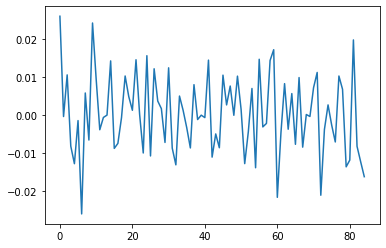

21


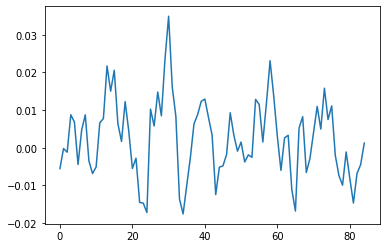

42


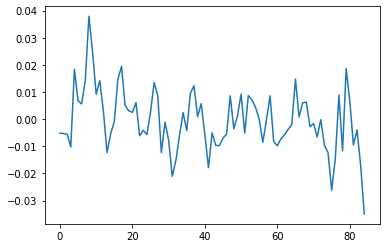

63


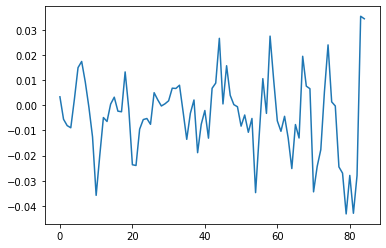

84


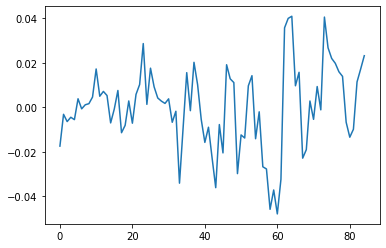

In [371]:
#252 trading days a year
#30 days = 21
#60 = 42
#90 = 63
#return = current - prior / prior

#for i in range(1,63): #[1,21,42,63]
for i in [1,21,42,63,84]: #[1,21,42,84]
    print(i)
    rate_of_change = (truncatedData[compare]-truncatedData[compare].shift(i))/truncatedData[compare].shift(i)
    
    newDF = pd.concat([rate_of_change,truncatedData[target].pct_change()],axis=1).dropna()

    set1 = newDF[compare]
    set2 = newDF[target]
    
    lags = range(0,85) #[0,21,42,63]
    mcorrs_ = []
    mlags = []
    for j in lags:
        
        newSet = pd.concat([set1.shift(j),set2],axis=1).dropna()
      
        mcorrs_.append(np.array(newSet.corr())[1,0])
        
    plt.plot(mcorrs_)
    plt.show()





In [352]:
pd.concat([(truncatedData[compare]-truncatedData[compare].shift(1))/truncatedData[compare].shift(1),truncatedData[target].pct_change().shift(0)],axis=1).dropna().corr()

,DGS2,^GSPC
DGS2,1.000000,0.265146
^GSPC,0.265146,1.000000


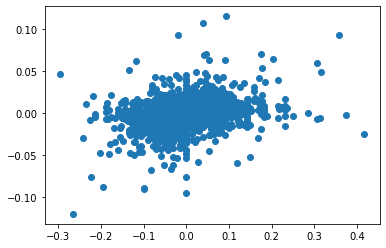

In [353]:
plt.scatter((truncatedData[compare]-truncatedData[compare].shift(1))/truncatedData[compare].shift(1),truncatedData[target].pct_change().shift(0))

In [354]:
#import matplotlib.pyplot as plt
#plt.matshow(
df = combined_set.loc[combined_set.index>=start_date.strftime('%Y-%m-%d')]

r_ = df.corr()

filter = r_[target]
                       
filter = filter[filter<1]
filter = filter.sort_values(kind="quicksort", ascending=True)
print(filter.head(10))
print(filter.tail(10))


NROU            -0.883872
M1V             -0.867568
FXS             -0.846593
ERENTUSQ176N    -0.839337
M2V             -0.833864
WEAT            -0.814779
CORN            -0.810458
CIVPART         -0.796326
TAGS            -0.777057
HDTGPDUSQ163N   -0.771190
Name: ^GSPC, dtype: float64
EOS              0.988678
HON              0.988814
XLC              0.989007
XLI              0.989530
XLY              0.992200
DIA              0.992419
WILLLRGCAPVAL    0.995199
^SP500TR         0.997898
SPY              0.997992
VOO              0.999298
Name: ^GSPC, dtype: float64
